In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/LinkNetB7.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = LinkNetB7()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Wed Nov 13 16:50:16 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8             16W /  340W |     310MiB /  16376MiB |      8%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LinkNetB7(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (encoder1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(64, 32, kernel_size=(1, 1), strid

/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.4069209098815918
→ ACC for Batch 1: 0.011808395385742188
→ Recall for Batch 1: 0.9908972691807543
→ Running_loss for Batch 21: 0.381335973739624
→ ACC for Batch 21: 0.9431037902832031
→ Recall for Batch 21: 3.352329869259135e-05
→ Running_loss for Batch 41: 0.38298487663269043
→ ACC for Batch 41: 0.9693984985351562
→ Recall for Batch 41: 0.0003741348132443724
→ Running_loss for Batch 61: 0.3140536844730377
→ ACC for Batch 61: 0.9671192169189453
→ Recall for Batch 61: 0.5246342583480942
→ Running_loss for Batch 81: 0.25013649463653564
→ ACC for Batch 81: 0.9723968505859375
→ Recall for Batch 81: 0.6570381547747359
→ Running_loss for Batch 101: 0.293483704328537
→ ACC for Batch 101: 0.9715175628662109
→ Recall for Batch 101: 0.7825112107623319
→ Running_loss for Batch 121: 0.2281379997730255
→ ACC for Batch 121: 0.980743408203125
→ Recall for Batch 121: 0.736437784522003
→ Running_loss for Batch 141: 0.301000

  1%|          | 1/100 [09:42<16:01:32, 582.76s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.12425267696380615
→ ACC for Batch 1: 0.9920253753662109
→ Recall for Batch 1: 0.7584067907280444
→ Running_loss for Batch 21: 0.1717299520969391
→ ACC for Batch 21: 0.9772090911865234
→ Recall for Batch 21: 0.7346555883141249
→ Running_loss for Batch 41: 0.12102840095758438
→ ACC for Batch 41: 0.9791927337646484
→ Recall for Batch 41: 0.7772603327307822
→ Running_loss for Batch 61: 0.1203908696770668
→ ACC for Batch 61: 0.9808769226074219
→ Recall for Batch 61: 0.7736377413191012
→ Running_loss for Batch 81: 0.16937582194805145
→ ACC for Batch 81: 0.9979133605957031
→ Recall for Batch 81: 0.703686420905273
→ Running_loss for Batch 101: 0.12875184416770935
→ ACC for Batch 101: 0.9911403656005859
→ Recall for Batch 101: 0.7969876103328205
→ Running_loss for Batch 121: 0.14297528564929962
→ ACC for Batch 121: 0.9748706817626953
→ Recall for Batch 121: 0.7482368225686711
→ Running_loss for Batch 141: 0.14553298

  2%|▏         | 2/100 [18:08<14:38:16, 537.72s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.12383780628442764
→ ACC for Batch 1: 0.9986534118652344
→ Recall for Batch 1: 0.772440562833576
→ Running_loss for Batch 21: 0.1079314574599266
→ ACC for Batch 21: 0.9936771392822266
→ Recall for Batch 21: 0.9166161922067434
→ Running_loss for Batch 41: 0.1610305905342102
→ ACC for Batch 41: 0.9951763153076172
→ Recall for Batch 41: 0.822135246792781
→ Running_loss for Batch 61: 0.14639747142791748
→ ACC for Batch 61: 0.9908504486083984
→ Recall for Batch 61: 0.8203522504892368
→ Running_loss for Batch 81: 0.09832102805376053
→ ACC for Batch 81: 0.9934177398681641
→ Recall for Batch 81: 0.8660453808752026
→ Running_loss for Batch 101: 0.11787966638803482
→ ACC for Batch 101: 0.9931869506835938
→ Recall for Batch 101: 0.838104543234001
→ Running_loss for Batch 121: 0.12596993148326874
→ ACC for Batch 121: 0.9834213256835938
→ Recall for Batch 121: 0.8036698792138378
→ Running_loss for Batch 141: 0.1771719306

  3%|▎         | 3/100 [26:48<14:16:15, 529.64s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.11317476630210876
→ ACC for Batch 1: 0.9899959564208984
→ Recall for Batch 1: 0.8720575838142792
→ Running_loss for Batch 21: 0.13335232436656952
→ ACC for Batch 21: 0.9824295043945312
→ Recall for Batch 21: 0.8563943588176222
→ Running_loss for Batch 41: 0.08235055208206177
→ ACC for Batch 41: 0.9908466339111328
→ Recall for Batch 41: 0.8810099000521056
→ Running_loss for Batch 61: 0.09733034670352936
→ ACC for Batch 61: 0.9925937652587891
→ Recall for Batch 61: 0.9189495989102467
→ Running_loss for Batch 81: 0.129529669880867
→ ACC for Batch 81: 0.9969501495361328
→ Recall for Batch 81: 0.8673548387096774
→ Running_loss for Batch 101: 0.11942194402217865
→ ACC for Batch 101: 0.9945087432861328
→ Recall for Batch 101: 0.8698770491803278
→ Running_loss for Batch 121: 0.08873770385980606
→ ACC for Batch 121: 0.9940032958984375
→ Recall for Batch 121: 0.8660553334900855
→ Running_loss for Batch 141: 0.0956141

  4%|▍         | 4/100 [35:19<13:55:11, 522.00s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.08339539915323257
→ ACC for Batch 1: 0.9880008697509766
→ Recall for Batch 1: 0.8886633699904052
→ Running_loss for Batch 21: 0.11128807812929153
→ ACC for Batch 21: 0.9817771911621094
→ Recall for Batch 21: 0.8319070705756028
→ Running_loss for Batch 41: 0.1401253193616867
→ ACC for Batch 41: 0.9986495971679688
→ Recall for Batch 41: 0.8807947019867549
→ Running_loss for Batch 61: 0.10980253666639328
→ ACC for Batch 61: 0.9902820587158203
→ Recall for Batch 61: 0.8880187940485513
→ Running_loss for Batch 81: 0.08584649860858917
→ ACC for Batch 81: 0.9919261932373047
→ Recall for Batch 81: 0.896065800069021
→ Running_loss for Batch 101: 0.10481227934360504
→ ACC for Batch 101: 0.9894275665283203
→ Recall for Batch 101: 0.8898737727910239
→ Running_loss for Batch 121: 0.12519125640392303
→ ACC for Batch 121: 0.9978733062744141
→ Recall for Batch 121: 0.8808087974459028
→ Running_loss for Batch 141: 0.1185190

  5%|▌         | 5/100 [43:54<13:42:36, 519.54s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.09597507119178772
→ ACC for Batch 1: 0.9977283477783203
→ Recall for Batch 1: 0.8895403377110694
→ Running_loss for Batch 21: 0.0776514858007431
→ ACC for Batch 21: 0.9958744049072266
→ Recall for Batch 21: 0.8756751543209876
→ Running_loss for Batch 41: 0.10172347724437714
→ ACC for Batch 41: 0.9935588836669922
→ Recall for Batch 41: 0.8608470181503889
→ Running_loss for Batch 61: 0.11650880426168442
→ ACC for Batch 61: 0.9924411773681641
→ Recall for Batch 61: 0.8700890047649016
→ Running_loss for Batch 81: 0.09998780488967896
→ ACC for Batch 81: 0.9899501800537109
→ Recall for Batch 81: 0.8449283058948487
→ Running_loss for Batch 101: 0.07557901740074158
→ ACC for Batch 101: 0.994598388671875
→ Recall for Batch 101: 0.9211480362537764
→ Running_loss for Batch 121: 0.10777309536933899
→ ACC for Batch 121: 0.9928035736083984
→ Recall for Batch 121: 0.8696979979640312
→ Running_loss for Batch 141: 0.0644731

  6%|▌         | 6/100 [52:14<13:23:43, 513.01s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.08380138128995895
→ ACC for Batch 1: 0.9939517974853516
→ Recall for Batch 1: 0.9297648514851485
→ Running_loss for Batch 21: 0.07143519073724747
→ ACC for Batch 21: 0.9959869384765625
→ Recall for Batch 21: 0.9068875163765675
→ Running_loss for Batch 41: 0.08407518267631531
→ ACC for Batch 41: 0.9919452667236328
→ Recall for Batch 41: 0.8813634351482957
→ Running_loss for Batch 61: 0.08887488394975662
→ ACC for Batch 61: 0.9952125549316406
→ Recall for Batch 61: 0.8788150807899462
→ Running_loss for Batch 81: 0.08040491491556168
→ ACC for Batch 81: 0.9917564392089844
→ Recall for Batch 81: 0.9100993638609958
→ Running_loss for Batch 101: 0.06368482112884521
→ ACC for Batch 101: 0.9958934783935547
→ Recall for Batch 101: 0.9486859614105123
→ Running_loss for Batch 121: 0.09055563807487488
→ ACC for Batch 121: 0.9926700592041016
→ Recall for Batch 121: 0.8961136534389728
→ Running_loss for Batch 141: 0.09976

  7%|▋         | 7/100 [1:00:35<13:08:47, 508.89s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.09882958978414536
→ ACC for Batch 1: 0.9986648559570312
→ Recall for Batch 1: 0.867288961038961
→ Running_loss for Batch 21: 0.10639133304357529
→ ACC for Batch 21: 0.9947700500488281
→ Recall for Batch 21: 0.9004149377593361
→ Running_loss for Batch 41: 0.11574040353298187
→ ACC for Batch 41: 0.99267578125
→ Recall for Batch 41: 0.8722698368813934
→ Running_loss for Batch 61: 0.09406192600727081
→ ACC for Batch 61: 0.9947605133056641
→ Recall for Batch 61: 0.8622414622414623
→ Running_loss for Batch 81: 0.07713921368122101
→ ACC for Batch 81: 0.9923229217529297
→ Recall for Batch 81: 0.8713962108731467
→ Running_loss for Batch 101: 0.09365474432706833
→ ACC for Batch 101: 0.9924087524414062
→ Recall for Batch 101: 0.881726230613621
→ Running_loss for Batch 121: 0.07527787983417511
→ ACC for Batch 121: 0.9948139190673828
→ Recall for Batch 121: 0.9224557001724949
→ Running_loss for Batch 141: 0.085181035101

  8%|▊         | 8/100 [1:09:00<12:58:27, 507.69s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.0612311027944088
→ ACC for Batch 1: 0.9937515258789062
→ Recall for Batch 1: 0.9176411035180967
→ Running_loss for Batch 21: 0.08377553522586823
→ ACC for Batch 21: 0.9902877807617188
→ Recall for Batch 21: 0.9112348509662627
→ Running_loss for Batch 41: 0.14817358553409576
→ ACC for Batch 41: 0.9984283447265625
→ Recall for Batch 41: 0.7782632441288914
→ Running_loss for Batch 61: 0.09130504727363586
→ ACC for Batch 61: 0.9960098266601562
→ Recall for Batch 61: 0.9003807106598984
→ Running_loss for Batch 81: 0.07787048071622849
→ ACC for Batch 81: 0.9911174774169922
→ Recall for Batch 81: 0.9185864247375671
→ Running_loss for Batch 101: 0.06863978505134583
→ ACC for Batch 101: 0.9934329986572266
→ Recall for Batch 101: 0.9048473967684022
→ Running_loss for Batch 121: 0.10425101965665817
→ ACC for Batch 121: 0.9954128265380859
→ Recall for Batch 121: 0.8622082018927445
→ Running_loss for Batch 141: 0.070870

  9%|▉         | 9/100 [1:17:30<12:51:08, 508.44s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.09291233867406845
→ ACC for Batch 1: 0.9778022766113281
→ Recall for Batch 1: 0.8352960969044414
→ Running_loss for Batch 21: 0.0881391242146492
→ ACC for Batch 21: 0.996246337890625
→ Recall for Batch 21: 0.8512072557911509
→ Running_loss for Batch 41: 0.09393376857042313
→ ACC for Batch 41: 0.9902992248535156
→ Recall for Batch 41: 0.8699411427678525
→ Running_loss for Batch 61: 0.09708408266305923
→ ACC for Batch 61: 0.9846038818359375
→ Recall for Batch 61: 0.8786680189317106
→ Running_loss for Batch 81: 0.0712963342666626
→ ACC for Batch 81: 0.9963035583496094
→ Recall for Batch 81: 0.9321487946799667
→ Running_loss for Batch 101: 0.09932422637939453
→ ACC for Batch 101: 0.9766826629638672
→ Recall for Batch 101: 0.8604410896516825
→ Running_loss for Batch 121: 0.08750811964273453
→ ACC for Batch 121: 0.9945106506347656
→ Recall for Batch 121: 0.8826700898587934
→ Running_loss for Batch 141: 0.0833814

 10%|█         | 10/100 [1:25:57<12:41:59, 507.99s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.06725209206342697
→ ACC for Batch 1: 0.9940013885498047
→ Recall for Batch 1: 0.9182149576669802
→ Running_loss for Batch 21: 0.07657206058502197
→ ACC for Batch 21: 0.9946708679199219
→ Recall for Batch 21: 0.9024128686327078
→ Running_loss for Batch 41: 0.07425066083669662
→ ACC for Batch 41: 0.9799404144287109
→ Recall for Batch 41: 0.8659871998816174
→ Running_loss for Batch 61: 0.11177393049001694
→ ACC for Batch 61: 0.9824657440185547
→ Recall for Batch 61: 0.8771270280965572
→ Running_loss for Batch 81: 0.07945408672094345
→ ACC for Batch 81: 0.9992504119873047
→ Recall for Batch 81: 0.9299175500588928
→ Running_loss for Batch 101: 0.08067913353443146
→ ACC for Batch 101: 0.9959125518798828
→ Recall for Batch 101: 0.9097229650229971
→ Running_loss for Batch 121: 0.07134760171175003
→ ACC for Batch 121: 0.9964199066162109
→ Recall for Batch 121: 0.9001658718639851
→ Running_loss for Batch 141: 0.0772

 11%|█         | 11/100 [1:34:25<12:33:32, 508.00s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.05866330862045288
→ ACC for Batch 1: 0.9931297302246094
→ Recall for Batch 1: 0.9298144876325088
→ Running_loss for Batch 21: 0.05824100971221924
→ ACC for Batch 21: 0.9962024688720703
→ Recall for Batch 21: 0.9185196825646263
→ Running_loss for Batch 41: 0.06770429760217667
→ ACC for Batch 41: 0.9920120239257812
→ Recall for Batch 41: 0.8928695350451076
→ Running_loss for Batch 61: 0.0906621515750885
→ ACC for Batch 61: 0.9949970245361328
→ Recall for Batch 61: 0.8775230256711738
→ Running_loss for Batch 81: 0.059591807425022125
→ ACC for Batch 81: 0.9929733276367188
→ Recall for Batch 81: 0.9190913062472695
→ Running_loss for Batch 101: 0.06436386704444885
→ ACC for Batch 101: 0.9950428009033203
→ Recall for Batch 101: 0.9333470762042191
→ Running_loss for Batch 121: 0.08175743371248245
→ ACC for Batch 121: 0.9947357177734375
→ Recall for Batch 121: 0.8918582454975517
→ Running_loss for Batch 141: 0.0592

 12%|█▏        | 12/100 [1:42:50<12:23:43, 507.08s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.08062072098255157
→ ACC for Batch 1: 0.9953136444091797
→ Recall for Batch 1: 0.9063140249580928
→ Running_loss for Batch 21: 0.07573122531175613
→ ACC for Batch 21: 0.9967212677001953
→ Recall for Batch 21: 0.906061723841141
→ Running_loss for Batch 41: 0.07252692431211472
→ ACC for Batch 41: 0.9870510101318359
→ Recall for Batch 41: 0.9109348475092197
→ Running_loss for Batch 61: 0.10287152230739594
→ ACC for Batch 61: 0.9977073669433594
→ Recall for Batch 61: 0.8458555501696559
→ Running_loss for Batch 81: 0.09058621525764465
→ ACC for Batch 81: 0.9979000091552734
→ Recall for Batch 81: 0.8679935941432166
→ Running_loss for Batch 101: 0.07417121529579163
→ ACC for Batch 101: 0.9799709320068359
→ Recall for Batch 101: 0.8518877765780275
→ Running_loss for Batch 121: 0.10828438401222229
→ ACC for Batch 121: 0.9828205108642578
→ Recall for Batch 121: 0.8768945046927338
→ Running_loss for Batch 141: 0.08830

 13%|█▎        | 13/100 [1:51:15<12:14:22, 506.47s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.061753153800964355
→ ACC for Batch 1: 0.9933357238769531
→ Recall for Batch 1: 0.9229180674286812
→ Running_loss for Batch 21: 0.06957880407571793
→ ACC for Batch 21: 0.9918956756591797
→ Recall for Batch 21: 0.9167721518987342
→ Running_loss for Batch 41: 0.0783931165933609
→ ACC for Batch 41: 0.9955730438232422
→ Recall for Batch 41: 0.8871193070690137
→ Running_loss for Batch 61: 0.06794272363185883
→ ACC for Batch 61: 0.9872646331787109
→ Recall for Batch 61: 0.8956966711124418
→ Running_loss for Batch 81: 0.05970239266753197
→ ACC for Batch 81: 0.9955062866210938
→ Recall for Batch 81: 0.9266864190725557
→ Running_loss for Batch 101: 0.07013595104217529
→ ACC for Batch 101: 0.9932746887207031
→ Recall for Batch 101: 0.9213713021841305
→ Running_loss for Batch 121: 0.08438090980052948
→ ACC for Batch 121: 0.9919567108154297
→ Recall for Batch 121: 0.8949537141566946
→ Running_loss for Batch 141: 0.0664

 14%|█▍        | 14/100 [1:59:42<12:06:16, 506.70s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.057390715926885605
→ ACC for Batch 1: 0.9964675903320312
→ Recall for Batch 1: 0.9219934994582882
→ Running_loss for Batch 21: 0.05818769708275795
→ ACC for Batch 21: 0.9939861297607422
→ Recall for Batch 21: 0.9346533655783958
→ Running_loss for Batch 41: 0.056604061275720596
→ ACC for Batch 41: 0.9892101287841797
→ Recall for Batch 41: 0.923288475915839
→ Running_loss for Batch 61: 0.06037217006087303
→ ACC for Batch 61: 0.9942378997802734
→ Recall for Batch 61: 0.9257149058549026
→ Running_loss for Batch 81: 0.06507031619548798
→ ACC for Batch 81: 0.9896793365478516
→ Recall for Batch 81: 0.919016393442623
→ Running_loss for Batch 101: 0.07564903050661087
→ ACC for Batch 101: 0.9925327301025391
→ Recall for Batch 101: 0.9090565426364962
→ Running_loss for Batch 121: 0.0519561767578125
→ ACC for Batch 121: 0.9955482482910156
→ Recall for Batch 121: 0.9481046384885552
→ Running_loss for Batch 141: 0.06504

 15%|█▌        | 15/100 [2:08:16<12:00:50, 508.83s/it]

Validation loss for Epoch 15: 0.09124945104122162

Acurácia de validação:  0.9922216086160569
F1-score de validação:  0.8448767532804392
IoU de validação:  0.9856652556349613
Recall de validação:  0.8658322715848266

---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.058960817754268646
→ ACC for Batch 1: 0.9888687133789062
→ Recall for Batch 1: 0.9294101658059255
→ Running_loss for Batch 21: 0.08474088460206985
→ ACC for Batch 21: 0.9988899230957031
→ Recall for Batch 21: 0.8912337662337663
→ Running_loss for Batch 41: 0.06406023353338242
→ ACC for Batch 41: 0.9967441558837891
→ Recall for Batch 41: 0.9346733668341709
→ Running_loss for Batch 61: 0.07866350561380386
→ ACC for Batch 61: 0.9949798583984375
→ Recall for Batch 61: 0.8926788685524126
→ Running_loss for Batch 81: 0.09004496037960052
→ ACC for Batch 81: 0.9990615844726562
→ Recall for Batch 81: 0.899311075781664
→ Running_loss for Batch 101: 0.06828124076128006
→ ACC for Batch 101: 0.9954471588134

 16%|█▌        | 16/100 [2:16:45<11:52:29, 508.93s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.07339175790548325
→ ACC for Batch 1: 0.9951896667480469
→ Recall for Batch 1: 0.9321008124689106
→ Running_loss for Batch 21: 0.04468853771686554
→ ACC for Batch 21: 0.9969711303710938
→ Recall for Batch 21: 0.952145585261739
→ Running_loss for Batch 41: 0.10112068802118301
→ ACC for Batch 41: 0.9878749847412109
→ Recall for Batch 41: 0.8823394810306164
→ Running_loss for Batch 61: 0.07203990966081619
→ ACC for Batch 61: 0.9967384338378906
→ Recall for Batch 61: 0.9243777539597475
→ Running_loss for Batch 81: 0.05795365199446678
→ ACC for Batch 81: 0.9943408966064453
→ Recall for Batch 81: 0.9284315282409613
→ Running_loss for Batch 101: 0.07910086959600449
→ ACC for Batch 101: 0.9925899505615234
→ Recall for Batch 101: 0.8963701228835155
→ Running_loss for Batch 121: 0.0699489489197731
→ ACC for Batch 121: 0.9963779449462891
→ Recall for Batch 121: 0.9091827457318921
→ Running_loss for Batch 141: 0.051579

 17%|█▋        | 17/100 [2:25:10<11:42:09, 507.58s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.06681361794471741
→ ACC for Batch 1: 0.9895820617675781
→ Recall for Batch 1: 0.9307940998181451
→ Running_loss for Batch 21: 0.0810127779841423
→ ACC for Batch 21: 0.9966621398925781
→ Recall for Batch 21: 0.8684376180284528
→ Running_loss for Batch 41: 0.1056668609380722
→ ACC for Batch 41: 0.9881362915039062
→ Recall for Batch 41: 0.8785407088832864
→ Running_loss for Batch 61: 0.06771721690893173
→ ACC for Batch 61: 0.9965476989746094
→ Recall for Batch 61: 0.8958647751282826
→ Running_loss for Batch 81: 0.06664455682039261
→ ACC for Batch 81: 0.9927921295166016
→ Recall for Batch 81: 0.9116088631984586
→ Running_loss for Batch 101: 0.06452494859695435
→ ACC for Batch 101: 0.9910564422607422
→ Recall for Batch 101: 0.9304766234750322
→ Running_loss for Batch 121: 0.09265695512294769
→ ACC for Batch 121: 0.9990196228027344
→ Recall for Batch 121: 0.8517600396628656
→ Running_loss for Batch 141: 0.078560

 18%|█▊        | 18/100 [2:33:41<11:35:15, 508.73s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.06942301243543625
→ ACC for Batch 1: 0.9993934631347656
→ Recall for Batch 1: 0.9100591715976332
→ Running_loss for Batch 21: 0.05214781314134598
→ ACC for Batch 21: 0.9955787658691406
→ Recall for Batch 21: 0.9361881785283475
→ Running_loss for Batch 41: 0.06584296375513077
→ ACC for Batch 41: 0.9926300048828125
→ Recall for Batch 41: 0.9199981318886605
→ Running_loss for Batch 61: 0.06921026110649109
→ ACC for Batch 61: 0.9923629760742188
→ Recall for Batch 61: 0.9219371853272597
→ Running_loss for Batch 81: 0.057145919650793076
→ ACC for Batch 81: 0.9954242706298828
→ Recall for Batch 81: 0.9460346638655462
→ Running_loss for Batch 101: 0.07107923924922943
→ ACC for Batch 101: 0.9980487823486328
→ Recall for Batch 101: 0.9112529002320185
→ Running_loss for Batch 121: 0.0764826312661171
→ ACC for Batch 121: 0.9949245452880859
→ Recall for Batch 121: 0.9082133376236827
→ Running_loss for Batch 141: 0.0636

 19%|█▉        | 19/100 [2:42:06<11:25:12, 507.56s/it]

Validation loss for Epoch 19: 0.08906140923500061

Acurácia de validação:  0.9925389531859778
F1-score de validação:  0.8510522070889474
IoU de validação:  0.9862149903542683
Recall de validação:  0.8718317113934475

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.06463237851858139
→ ACC for Batch 1: 0.99798583984375
→ Recall for Batch 1: 0.9526534859521332
→ Running_loss for Batch 21: 0.08246379345655441
→ ACC for Batch 21: 0.9941082000732422
→ Recall for Batch 21: 0.9071477298567422
→ Running_loss for Batch 41: 0.07241379469633102
→ ACC for Batch 41: 0.9965534210205078
→ Recall for Batch 41: 0.8959404748878433
→ Running_loss for Batch 61: 0.09569333493709564
→ ACC for Batch 61: 0.9988555908203125
→ Recall for Batch 61: 0.8646209386281588
→ Running_loss for Batch 81: 0.07376822829246521
→ ACC for Batch 81: 0.9926013946533203
→ Recall for Batch 81: 0.8896523221573591
→ Running_loss for Batch 101: 0.05538729578256607
→ ACC for Batch 101: 0.996240615844726

 20%|██        | 20/100 [2:50:35<11:17:12, 507.91s/it]


---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.09495269507169724
→ ACC for Batch 1: 0.9958915710449219
→ Recall for Batch 1: 0.8562608051370709
→ Running_loss for Batch 21: 0.06336040794849396
→ ACC for Batch 21: 0.9935684204101562
→ Recall for Batch 21: 0.927754489468509
→ Running_loss for Batch 41: 0.06240720674395561
→ ACC for Batch 41: 0.9940357208251953
→ Recall for Batch 41: 0.935843024858072
→ Running_loss for Batch 61: 0.07014506310224533
→ ACC for Batch 61: 0.9935817718505859
→ Recall for Batch 61: 0.9181164463001624
→ Running_loss for Batch 81: 0.08210963755846024
→ ACC for Batch 81: 0.9874610900878906
→ Recall for Batch 81: 0.8946408915795266
→ Running_loss for Batch 101: 0.07152102887630463
→ ACC for Batch 101: 0.991058349609375
→ Recall for Batch 101: 0.9055523037043232
→ Running_loss for Batch 121: 0.08209879696369171
→ ACC for Batch 121: 0.9896354675292969
→ Recall for Batch 121: 0.889610661749298
→ Running_loss for Batch 141: 0.05456729

 21%|██        | 21/100 [2:59:01<11:08:14, 507.53s/it]


---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.0752858966588974
→ ACC for Batch 1: 0.9987297058105469
→ Recall for Batch 1: 0.89875
→ Running_loss for Batch 21: 0.06597926467657089
→ ACC for Batch 21: 0.9941558837890625
→ Recall for Batch 21: 0.9162972158184075
→ Running_loss for Batch 41: 0.05462660267949104
→ ACC for Batch 41: 0.9921588897705078
→ Recall for Batch 41: 0.9423257493680028
→ Running_loss for Batch 61: 0.08292300254106522
→ ACC for Batch 61: 0.9881687164306641
→ Recall for Batch 61: 0.926771653543307
→ Running_loss for Batch 81: 0.09362693130970001
→ ACC for Batch 81: 0.9994392395019531
→ Recall for Batch 81: 0.8622222222222222
→ Running_loss for Batch 101: 0.05567886307835579
→ ACC for Batch 101: 0.99462890625
→ Recall for Batch 101: 0.936901559978483
→ Running_loss for Batch 121: 0.08258260786533356
→ ACC for Batch 121: 0.9898395538330078
→ Recall for Batch 121: 0.8715821552526877
→ Running_loss for Batch 141: 0.09727014601230621
→ ACC

 22%|██▏       | 22/100 [3:07:31<11:00:46, 508.29s/it]

Validation loss for Epoch 22: 0.08792377263307571

Acurácia de validação:  0.9927161328204266
F1-score de validação:  0.8546085698544993
IoU de validação:  0.9865225480452189
Recall de validação:  0.8752755313850423

---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.061256974935531616
→ ACC for Batch 1: 0.995330810546875
→ Recall for Batch 1: 0.9399875406658822
→ Running_loss for Batch 21: 0.07393671572208405
→ ACC for Batch 21: 0.9944305419921875
→ Recall for Batch 21: 0.8967436682438074
→ Running_loss for Batch 41: 0.08080857247114182
→ ACC for Batch 41: 0.9932918548583984
→ Recall for Batch 41: 0.9168306441033713
→ Running_loss for Batch 61: 0.06620211154222488
→ ACC for Batch 61: 0.9955272674560547
→ Recall for Batch 61: 0.9139211136890951
→ Running_loss for Batch 81: 0.057747360318899155
→ ACC for Batch 81: 0.9923191070556641
→ Recall for Batch 81: 0.9361885037708569
→ Running_loss for Batch 101: 0.08996529877185822
→ ACC for Batch 101: 0.997669219970

 23%|██▎       | 23/100 [3:15:58<10:51:38, 507.77s/it]

Validation loss for Epoch 23: 0.08770018070936203

Acurácia de validação:  0.9927692502181723
F1-score de validação:  0.8555427581117044
IoU de validação:  0.986613341750417
Recall de validação:  0.8759568298921776

---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.09786681830883026
→ ACC for Batch 1: 0.9899883270263672
→ Recall for Batch 1: 0.8666560712015258
→ Running_loss for Batch 21: 0.08598301559686661
→ ACC for Batch 21: 0.9918117523193359
→ Recall for Batch 21: 0.8937826778813367
→ Running_loss for Batch 41: 0.08910675346851349
→ ACC for Batch 41: 0.9933509826660156
→ Recall for Batch 41: 0.8890182665017102
→ Running_loss for Batch 61: 0.06723450869321823
→ ACC for Batch 61: 0.9969902038574219
→ Recall for Batch 61: 0.9051754081278222
→ Running_loss for Batch 81: 0.07007884234189987
→ ACC for Batch 81: 0.9973411560058594
→ Recall for Batch 81: 0.925437981779958
→ Running_loss for Batch 101: 0.0640949234366417
→ ACC for Batch 101: 0.9994430541992188

 24%|██▍       | 24/100 [3:24:28<10:43:58, 508.40s/it]

Validation loss for Epoch 24: 0.0879177674651146

Acurácia de validação:  0.9928137212991714
F1-score de validação:  0.8563985358460946
IoU de validação:  0.9866913758330956
Recall de validação:  0.8769940309600053

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.04400619491934776
→ ACC for Batch 1: 0.9968376159667969
→ Recall for Batch 1: 0.9553318207600681
→ Running_loss for Batch 21: 0.10381424427032471
→ ACC for Batch 21: 0.9884109497070312
→ Recall for Batch 21: 0.8266874793056147
→ Running_loss for Batch 41: 0.05173064395785332
→ ACC for Batch 41: 0.9926528930664062
→ Recall for Batch 41: 0.9233668788449912
→ Running_loss for Batch 61: 0.0595984123647213
→ ACC for Batch 61: 0.995513916015625
→ Recall for Batch 61: 0.916886990712494
→ Running_loss for Batch 81: 0.07483585178852081
→ ACC for Batch 81: 0.9954452514648438
→ Recall for Batch 81: 0.8893805309734514
→ Running_loss for Batch 101: 0.0608198381960392
→ ACC for Batch 101: 0.9897975921630859
→

 25%|██▌       | 25/100 [3:32:57<10:35:47, 508.64s/it]

Validation loss for Epoch 25: 0.08757428824901581

Acurácia de validação:  0.9928547246115548
F1-score de validação:  0.857237234010008
IoU de validação:  0.9867636453686975
Recall de validação:  0.8780287072982571

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.0401071272790432
→ ACC for Batch 1: 0.997039794921875
→ Recall for Batch 1: 0.9538735286066247
→ Running_loss for Batch 21: 0.060828886926174164
→ ACC for Batch 21: 0.9955787658691406
→ Recall for Batch 21: 0.9368040491684744
→ Running_loss for Batch 41: 0.0886043831706047
→ ACC for Batch 41: 0.9900779724121094
→ Recall for Batch 41: 0.8828046263857561
→ Running_loss for Batch 61: 0.08701860904693604
→ ACC for Batch 61: 0.9932613372802734
→ Recall for Batch 61: 0.8921074727120067
→ Running_loss for Batch 81: 0.06201481074094772
→ ACC for Batch 81: 0.9942436218261719
→ Recall for Batch 81: 0.9244065323531062
→ Running_loss for Batch 101: 0.07027404755353928
→ ACC for Batch 101: 0.9945602416992188

 26%|██▌       | 26/100 [3:41:26<10:27:27, 508.74s/it]


---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.06910625845193863
→ ACC for Batch 1: 0.9871253967285156
→ Recall for Batch 1: 0.9183854267600565
→ Running_loss for Batch 21: 0.05725434795022011
→ ACC for Batch 21: 0.9954490661621094
→ Recall for Batch 21: 0.920901029192828
→ Running_loss for Batch 41: 0.06940174102783203
→ ACC for Batch 41: 0.9984855651855469
→ Recall for Batch 41: 0.9285714285714286
→ Running_loss for Batch 61: 0.06019643694162369
→ ACC for Batch 61: 0.9988079071044922
→ Recall for Batch 61: 0.9265359477124183
→ Running_loss for Batch 81: 0.08300448954105377
→ ACC for Batch 81: 0.9945869445800781
→ Recall for Batch 81: 0.886515571498451
→ Running_loss for Batch 101: 0.07551750540733337
→ ACC for Batch 101: 0.9909420013427734
→ Recall for Batch 101: 0.9023920091124157
→ Running_loss for Batch 121: 0.07853034883737564
→ ACC for Batch 121: 0.9939117431640625
→ Recall for Batch 121: 0.902657304144293
→ Running_loss for Batch 141: 0.0396911

 27%|██▋       | 27/100 [3:49:59<10:20:30, 510.01s/it]

Validation loss for Epoch 27: 0.08808567374944687

Acurácia de validação:  0.9929333508960785
F1-score de validação:  0.8586966304415818
IoU de validação:  0.9869007506239399
Recall de validação:  0.8793607509421488

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.07900093495845795
→ ACC for Batch 1: 0.9802951812744141
→ Recall for Batch 1: 0.8898931799506984
→ Running_loss for Batch 21: 0.07898011803627014
→ ACC for Batch 21: 0.9880332946777344
→ Recall for Batch 21: 0.9122770345596433
→ Running_loss for Batch 41: 0.09080374240875244
→ ACC for Batch 41: 0.9990348815917969
→ Recall for Batch 41: 0.8754394776494224
→ Running_loss for Batch 61: 0.07515767961740494
→ ACC for Batch 61: 0.9861125946044922
→ Recall for Batch 61: 0.9117736622096725
→ Running_loss for Batch 81: 0.05253519117832184
→ ACC for Batch 81: 0.9910449981689453
→ Recall for Batch 81: 0.929406850459482
→ Running_loss for Batch 101: 0.0479096882045269
→ ACC for Batch 101: 0.996692657470703

 28%|██▊       | 28/100 [3:58:24<10:10:25, 508.68s/it]

Validation loss for Epoch 28: 0.08890779316425323

Acurácia de validação:  0.9929679747746916
F1-score de validação:  0.859265892160372
IoU de validação:  0.9869614506052025
Recall de validação:  0.8799326204192152

---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.08450610190629959
→ ACC for Batch 1: 0.9880390167236328
→ Recall for Batch 1: 0.8979576484748185
→ Running_loss for Batch 21: 0.10178575664758682
→ ACC for Batch 21: 0.9871730804443359
→ Recall for Batch 21: 0.8885565336296043
→ Running_loss for Batch 41: 0.14260514080524445
→ ACC for Batch 41: 0.9981441497802734
→ Recall for Batch 41: 0.8552567237163814
→ Running_loss for Batch 61: 0.07120443880558014
→ ACC for Batch 61: 0.99267578125
→ Recall for Batch 61: 0.9016576833112987
→ Running_loss for Batch 81: 0.0998249426484108
→ ACC for Batch 81: 0.9986953735351562
→ Recall for Batch 81: 0.8383013474887709
→ Running_loss for Batch 101: 0.05094735324382782
→ ACC for Batch 101: 0.9965190887451172
→ R

 29%|██▉       | 29/100 [4:06:57<10:03:19, 509.86s/it]

Validation loss for Epoch 29: 0.08699078112840652

Acurácia de validação:  0.993000864982605
F1-score de validação:  0.8599150268636133
IoU de validação:  0.9870188866910283
Recall de validação:  0.8806143131119196

---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.054143451154232025
→ ACC for Batch 1: 0.9953689575195312
→ Recall for Batch 1: 0.9387509042681457
→ Running_loss for Batch 21: 0.06425602734088898
→ ACC for Batch 21: 0.9964885711669922
→ Recall for Batch 21: 0.911706255323176
→ Running_loss for Batch 41: 0.048942580819129944
→ ACC for Batch 41: 0.9964179992675781
→ Recall for Batch 41: 0.94181260029303
→ Running_loss for Batch 61: 0.05870881676673889
→ ACC for Batch 61: 0.9945735931396484
→ Recall for Batch 61: 0.9225727616085314
→ Running_loss for Batch 81: 0.07300888001918793
→ ACC for Batch 81: 0.9988231658935547
→ Recall for Batch 81: 0.9091204154495294
→ Running_loss for Batch 101: 0.043996453285217285
→ ACC for Batch 101: 0.99707984924316

 30%|███       | 30/100 [4:15:29<9:55:25, 510.37s/it] 


---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.07375659793615341
→ ACC for Batch 1: 0.9955940246582031
→ Recall for Batch 1: 0.9023423740753787
→ Running_loss for Batch 21: 0.04107712581753731
→ ACC for Batch 21: 0.9971160888671875
→ Recall for Batch 21: 0.9525474525474525
→ Running_loss for Batch 41: 0.06099608168005943
→ ACC for Batch 41: 0.9971752166748047
→ Recall for Batch 41: 0.9099278979478647
→ Running_loss for Batch 61: 0.07416069507598877
→ ACC for Batch 61: 0.9984664916992188
→ Recall for Batch 61: 0.9092772936955408
→ Running_loss for Batch 81: 0.06780125945806503
→ ACC for Batch 81: 0.9986553192138672
→ Recall for Batch 81: 0.9172008547008547
→ Running_loss for Batch 101: 0.05890289321541786
→ ACC for Batch 101: 0.9893093109130859
→ Recall for Batch 101: 0.9262521881529165
→ Running_loss for Batch 121: 0.059116918593645096
→ ACC for Batch 121: 0.9952735900878906
→ Recall for Batch 121: 0.9237929028504944
→ Running_loss for Batch 141: 0.060

 31%|███       | 31/100 [4:23:56<9:45:47, 509.38s/it]

Validation loss for Epoch 31: 0.08629962801933289

Acurácia de validação:  0.9930634471128613
F1-score de validação:  0.8611834587421768
IoU de validação:  0.9871277052160173
Recall de validação:  0.8818010070164858

---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.06624897569417953
→ ACC for Batch 1: 0.9963588714599609
→ Recall for Batch 1: 0.9243632868813071
→ Running_loss for Batch 21: 0.05027316138148308
→ ACC for Batch 21: 0.9951324462890625
→ Recall for Batch 21: 0.9469111454613294
→ Running_loss for Batch 41: 0.06603839993476868
→ ACC for Batch 41: 0.9934005737304688
→ Recall for Batch 41: 0.9118732138217719
→ Running_loss for Batch 61: 0.09346260130405426
→ ACC for Batch 61: 0.990203857421875
→ Recall for Batch 61: 0.8845914235281902
→ Running_loss for Batch 81: 0.041105758398771286
→ ACC for Batch 81: 0.9969196319580078
→ Recall for Batch 81: 0.9477596945951376
→ Running_loss for Batch 101: 0.056006141006946564
→ ACC for Batch 101: 0.990085601806

 32%|███▏      | 32/100 [4:32:27<9:37:58, 509.98s/it]


---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.0735628679394722
→ ACC for Batch 1: 0.9989013671875
→ Recall for Batch 1: 0.9166067577282531
→ Running_loss for Batch 21: 0.1019013524055481
→ ACC for Batch 21: 0.9989566802978516
→ Recall for Batch 21: 0.8630504833512352
→ Running_loss for Batch 41: 0.05160282552242279
→ ACC for Batch 41: 0.996429443359375
→ Recall for Batch 41: 0.9517747491388348
→ Running_loss for Batch 61: 0.063223697245121
→ ACC for Batch 61: 0.9995384216308594
→ Recall for Batch 61: 0.899584487534626
→ Running_loss for Batch 81: 0.05567777901887894
→ ACC for Batch 81: 0.9947147369384766
→ Recall for Batch 81: 0.9383834524914042
→ Running_loss for Batch 101: 0.06617444008588791
→ ACC for Batch 101: 0.9958381652832031
→ Recall for Batch 101: 0.9313151869753243
→ Running_loss for Batch 121: 0.05495448037981987
→ ACC for Batch 121: 0.9974117279052734
→ Recall for Batch 121: 0.9472811671087533
→ Running_loss for Batch 141: 0.0543702878057

 33%|███▎      | 33/100 [4:40:51<9:27:36, 508.31s/it]

Validation loss for Epoch 33: 0.08618784695863724

Acurácia de validação:  0.9931210743916499
F1-score de validação:  0.862301365376322
IoU de validação:  0.9872268704218902
Recall de validação:  0.8825580390662959

---------Training for Epoch 34 starting:---------
→ Running_loss for Batch 1: 0.08244390040636063
→ ACC for Batch 1: 0.9972858428955078
→ Recall for Batch 1: 0.8796400449943758
→ Running_loss for Batch 21: 0.06962720304727554
→ ACC for Batch 21: 0.9963626861572266
→ Recall for Batch 21: 0.9218241042345277
→ Running_loss for Batch 41: 0.04895993694663048
→ ACC for Batch 41: 0.9947853088378906
→ Recall for Batch 41: 0.9320659903290035
→ Running_loss for Batch 61: 0.09015688300132751
→ ACC for Batch 61: 0.9950485229492188
→ Recall for Batch 61: 0.8942634419348391
→ Running_loss for Batch 81: 0.08579880744218826
→ ACC for Batch 81: 0.9982471466064453
→ Recall for Batch 81: 0.9108453384071759
→ Running_loss for Batch 101: 0.06515997648239136
→ ACC for Batch 101: 0.98482131958007

 34%|███▍      | 34/100 [4:49:18<9:18:32, 507.77s/it]


---------Training for Epoch 35 starting:---------
→ Running_loss for Batch 1: 0.04886690899729729
→ ACC for Batch 1: 0.9962806701660156
→ Recall for Batch 1: 0.934387932185289
→ Running_loss for Batch 21: 0.05414417013525963
→ ACC for Batch 21: 0.9942569732666016
→ Recall for Batch 21: 0.9419888159494286
→ Running_loss for Batch 41: 0.05955154821276665
→ ACC for Batch 41: 0.9943065643310547
→ Recall for Batch 41: 0.9238819657981334
→ Running_loss for Batch 61: 0.08423755317926407
→ ACC for Batch 61: 0.9906558990478516
→ Recall for Batch 61: 0.9121469754715137
→ Running_loss for Batch 81: 0.06976848840713501
→ ACC for Batch 81: 0.9934310913085938
→ Recall for Batch 81: 0.9050933598497404
→ Running_loss for Batch 101: 0.07113301753997803
→ ACC for Batch 101: 0.9919223785400391
→ Recall for Batch 101: 0.9162315867984338
→ Running_loss for Batch 121: 0.05407417193055153
→ ACC for Batch 121: 0.9947433471679688
→ Recall for Batch 121: 0.9244869183769387
→ Running_loss for Batch 141: 0.06102

 35%|███▌      | 35/100 [4:57:45<9:09:49, 507.53s/it]

Validation loss for Epoch 35: 0.08626943081617355

Acurácia de validação:  0.9931740269369008
F1-score de validação:  0.8633051868192226
IoU de validação:  0.9873171085257106
Recall de validação:  0.8830614482495783

---------Training for Epoch 36 starting:---------
→ Running_loss for Batch 1: 0.052760444581508636
→ ACC for Batch 1: 0.9918804168701172
→ Recall for Batch 1: 0.9361319938793161
→ Running_loss for Batch 21: 0.07338383793830872
→ ACC for Batch 21: 0.9930686950683594
→ Recall for Batch 21: 0.9173876166242578
→ Running_loss for Batch 41: 0.0759231373667717
→ ACC for Batch 41: 0.9956626892089844
→ Recall for Batch 41: 0.9088356420816174
→ Running_loss for Batch 61: 0.07522428780794144
→ ACC for Batch 61: 0.9937705993652344
→ Recall for Batch 61: 0.900420221571374
→ Running_loss for Batch 81: 0.063216432929039
→ ACC for Batch 81: 0.9976749420166016
→ Recall for Batch 81: 0.9076858813700919
→ Running_loss for Batch 101: 0.0534650944173336
→ ACC for Batch 101: 0.9914951324462891


 36%|███▌      | 36/100 [5:06:09<9:00:25, 506.64s/it]

Validation loss for Epoch 36: 0.08696796745061874

Acurácia de validação:  0.993196314762509
F1-score de validação:  0.8637046681533336
IoU de validação:  0.9873563737464439
Recall de validação:  0.8835074429845208

---------Training for Epoch 37 starting:---------
→ Running_loss for Batch 1: 0.08248641341924667
→ ACC for Batch 1: 0.9939804077148438
→ Recall for Batch 1: 0.8780857514075358
→ Running_loss for Batch 21: 0.06371933966875076
→ ACC for Batch 21: 0.9964179992675781
→ Recall for Batch 21: 0.9280709948622139
→ Running_loss for Batch 41: 0.09246611595153809
→ ACC for Batch 41: 0.9886665344238281
→ Recall for Batch 41: 0.8948624988946856
→ Running_loss for Batch 61: 0.05917523428797722
→ ACC for Batch 61: 0.9969844818115234
→ Recall for Batch 61: 0.9317903752039152
→ Running_loss for Batch 81: 0.06338873505592346
→ ACC for Batch 81: 0.9960231781005859
→ Recall for Batch 81: 0.9204252844920674
→ Running_loss for Batch 101: 0.09225999563932419
→ ACC for Batch 101: 0.99590301513671

 37%|███▋      | 37/100 [5:14:35<8:51:45, 506.44s/it]

Validation loss for Epoch 37: 0.08599987626075745

Acurácia de validação:  0.9932191652680916
F1-score de validação:  0.8641275689247716
IoU de validação:  0.9873956581378516
Recall de validação:  0.8837888942577983

---------Training for Epoch 38 starting:---------
→ Running_loss for Batch 1: 0.07035831362009048
→ ACC for Batch 1: 0.991973876953125
→ Recall for Batch 1: 0.9096045197740112
→ Running_loss for Batch 21: 0.07776562869548798
→ ACC for Batch 21: 0.9885692596435547
→ Recall for Batch 21: 0.8867438413213806
→ Running_loss for Batch 41: 0.05030383542180061
→ ACC for Batch 41: 0.9940547943115234
→ Recall for Batch 41: 0.9332960845833155
→ Running_loss for Batch 61: 0.06270874291658401
→ ACC for Batch 61: 0.9880294799804688
→ Recall for Batch 61: 0.9043240226433147
→ Running_loss for Batch 81: 0.09175923466682434
→ ACC for Batch 81: 0.9897632598876953
→ Recall for Batch 81: 0.848218048986091
→ Running_loss for Batch 101: 0.08803629875183105
→ ACC for Batch 101: 0.998111724853515

 38%|███▊      | 38/100 [5:23:04<8:44:07, 507.22s/it]

Validation loss for Epoch 38: 0.08661764115095139

Acurácia de validação:  0.9932400718667453
F1-score de validação:  0.8644932324574494
IoU de validação:  0.9874318119597986
Recall de validação:  0.8840480741801857

---------Training for Epoch 39 starting:---------
→ Running_loss for Batch 1: 0.05837908387184143
→ ACC for Batch 1: 0.9940681457519531
→ Recall for Batch 1: 0.922944074770153
→ Running_loss for Batch 21: 0.07170375436544418
→ ACC for Batch 21: 0.9883213043212891
→ Recall for Batch 21: 0.9021399910833705
→ Running_loss for Batch 41: 0.04416780173778534
→ ACC for Batch 41: 0.9972267150878906
→ Recall for Batch 41: 0.9555196118075212
→ Running_loss for Batch 61: 0.04997541010379791
→ ACC for Batch 61: 0.9968547821044922
→ Recall for Batch 61: 0.946397836242931
→ Running_loss for Batch 81: 0.052471913397312164
→ ACC for Batch 81: 0.9900074005126953
→ Recall for Batch 81: 0.9372569006679363
→ Running_loss for Batch 101: 0.05591988563537598
→ ACC for Batch 101: 0.99590110778808

 38%|███▊      | 38/100 [5:31:33<9:00:57, 523.50s/it]

Validation loss for Epoch 39: 0.08590073883533478

Acurácia de validação:  0.9932608560764746
F1-score de validação:  0.8648667652001705
IoU de validação:  0.9874675009985002
Recall de validação:  0.8842776842193336
Early stopping triggered


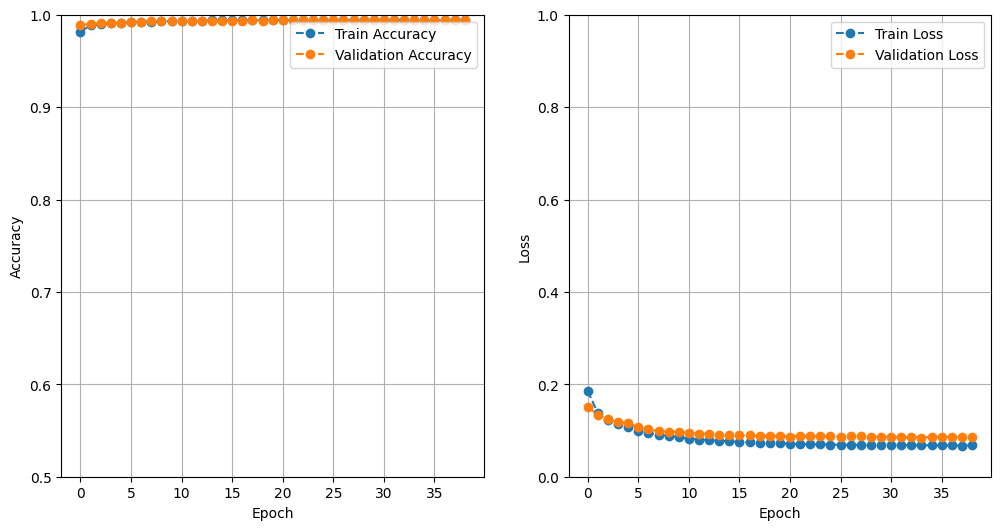

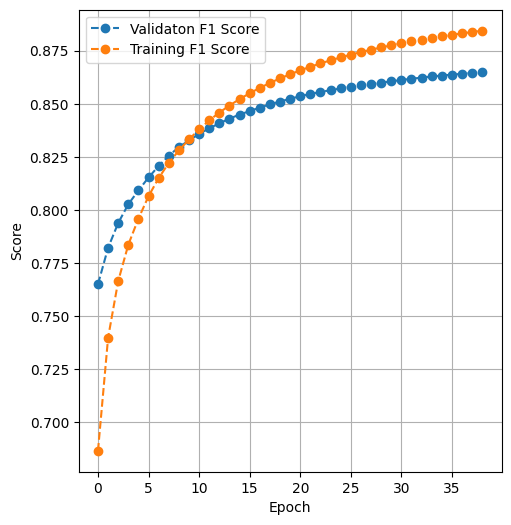

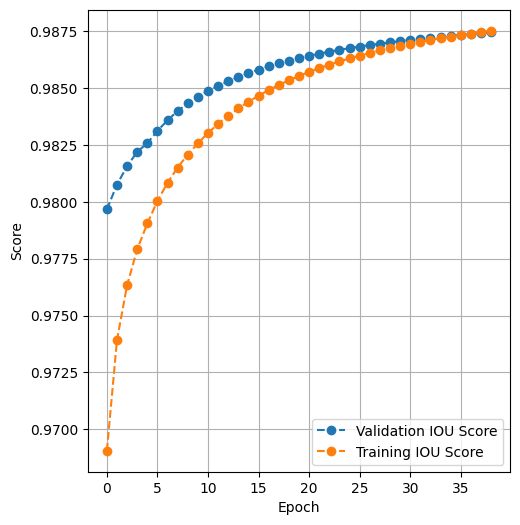

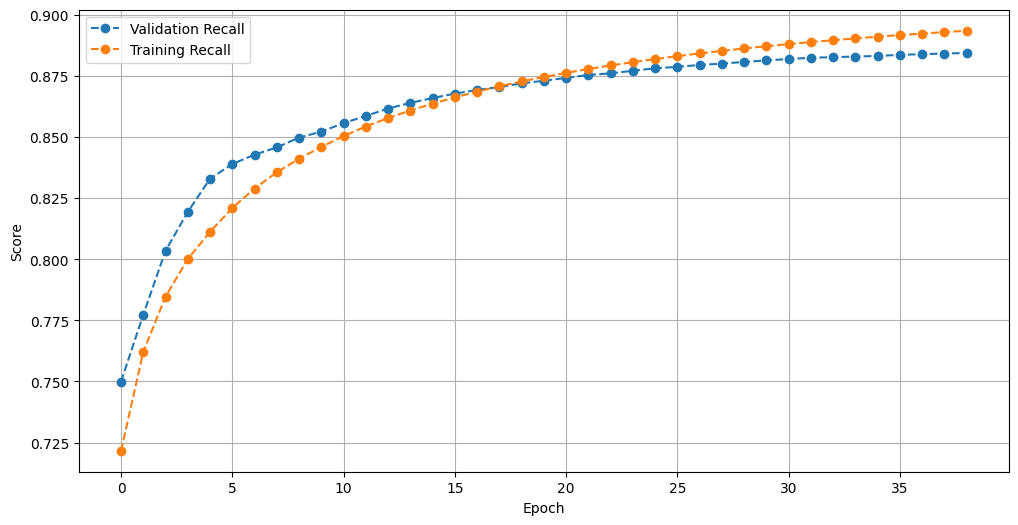

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=2,
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=5,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


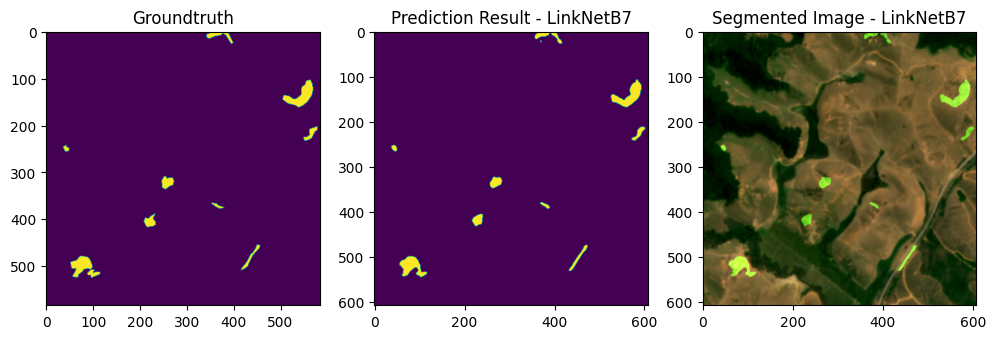

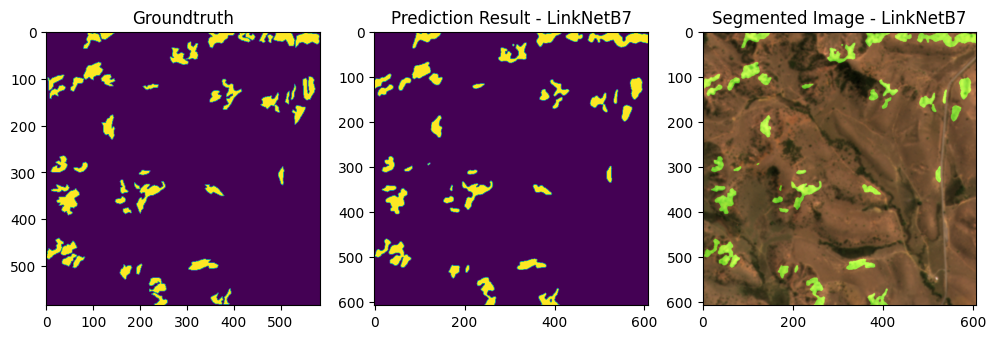

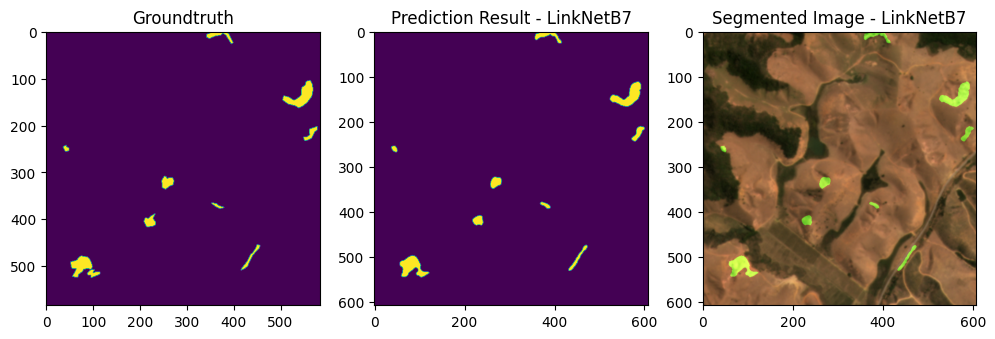

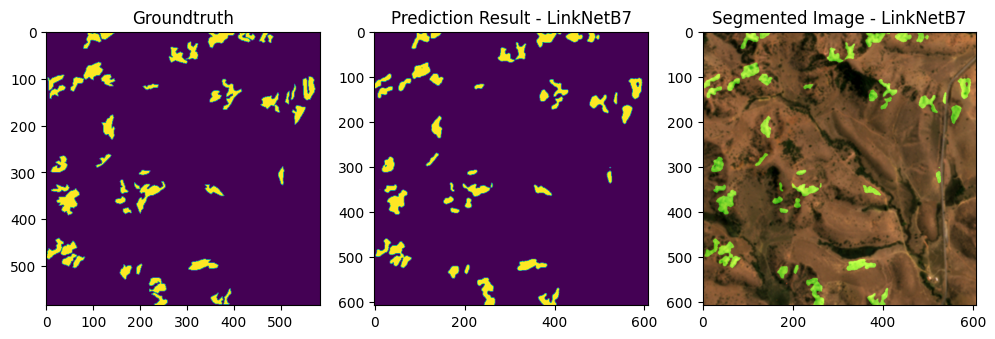

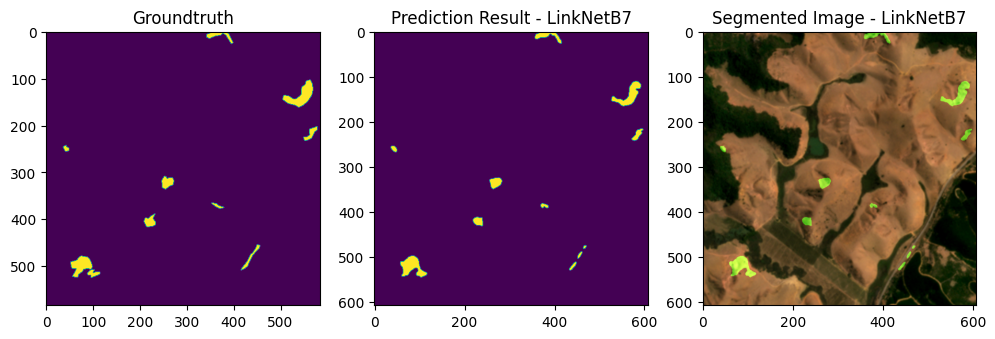

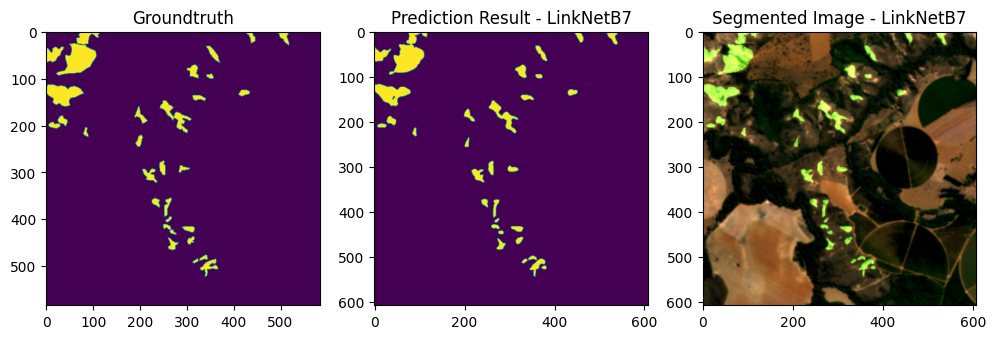

In [ ]:
# %%

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)